## Random Walks
* important in biology
* ...and finance (sigh)
* https://en.wikipedia.org/wiki/Random_walk
We will begin our random walk at 0 and each step will consist of -1 or +1. We will only do 1000 steps because we are using regular ol' Python. __Your homework __ has your re-do this program using arrays in NumPy and you can compare the timing of 1000 steps but allow your program to go up to millions of steps since it should be more efficient.

CPU times: user 29.8 ms, sys: 24.7 ms, total: 54.6 ms
Wall time: 107 ms


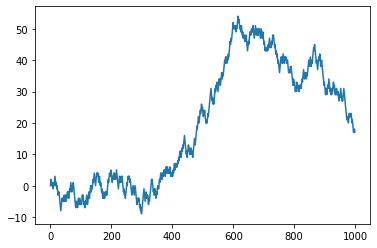

In [9]:
%%time
import random
# I am importing matplotlib so that I can plot the results of the Python code. You could
# probably also do this with plotly but I didn't. 
import matplotlib.pyplot as plt
# starting at point 0
position = 0
# setting up an array that begins with 0 and we will fill it up with 1000 steps
# in the for loop below.
walk = [position]
steps = 1000
for i in range(steps):
    #random.randint generates 0 or 1 randomly.
    if random.randint(0,1)==1:
        step = 1
    else:
        step = -1
    # obviously, if we were modeling proportionof alleles we would need to put a floor 
    # of 0 onto this calculation since you can't have a negative frequency of a gene. 
    # However, this example is simpler than that! 
    # In fact: How would we go about putting a floor of 0 into this code? 
    position = position + step
    # append the new position to the array for each of the 1000 steps
    walk.append(position)
    
# there should be 1000 steps in the filled-in array 
#print(walk)
#print(len(walk))    
# using matplotlib to plot results of 0-1000 steps
plt.plot(walk[:1000])
# we can refresh this code and expect to get different results each time. 
# We can also only take the first 100 steps or 500 step etc.

### 1. Intro to NumPy

NumPy is a Python package. It stands for 'Numerical Python' and, unsurprisingly, it is a library consisting of all the things (data types and routines) that you might need for scientific computing. It contains "list-like" objects that are highly optimized and work like multidimensional array objects, matrices and data tables which is how scientists tend to think data should look: homogeneous. The tables that are produced by NumPy have tuples as indices....just so you know. It is, after all, kinda cool that someone built a more complex data type out of the data types that we have already seen. 

NumPy's array objects are considered the **lingua franca** of data 'exchange' since it 'talks' to C, C++ and Fortran and so it is often used along with packages like SciPy (Scientific Python) and MatPlotLib (plotting library) and PANDAS.  We'll look at those other packages, as well, but since NumPy was adopted first - and the other packages were often optimized wrt to NumPy - it makes sense to begin with it. 


Why do we care? 
•	Mathematical and logical operations on arrays (**ndarray** is an efficient multidimensional array object) WITHOUT HAVING TO WRITE LOOPS. This is crucial on LARGE data sets (like we have in genomics etc). It allows you to use Python in a way that is sort of a cross between R and Haskell (functional programming language) which makes it memory efficient. This is called *VECTORIZATION*. There is a special term for applying functions to each elements of multiple, compatibly-shaped arrays in NumPy: *BROADCASTING* It also uses a __contiguous block of memory to store data__ so the program isn't having to check the data type since the data is *homogeneous* (and other kinds of surveillance) which adds overhead to the working memroy...allowing it to be darn efficient. In fact, NumPy algorithms are 10-100X FASTER than their pure Python counterparts! We see this in the cell below. 

•	Fourier transforms (we mostly care about Fourier's ability to identify and process signals - especially repeating ones - in biology) and routines for shape manipulation of matrices (we don't really about these things in this class but they having easy access to these functions makes NumPy extremely useful!).

•	Operations related to linear algebra. NumPy has in-built functions for linear algebra and random number generation and also allows us to easily use popular methods for reducing-dimensionality like PCA (Principle Component Analysis). Broadcasting is when you use operations between arrays of different sizes. This is reasonably straightforward to do with NumPy but we won't cover it here except to note that when we multiply an array by a scalar that is an example of broadcasting (the scalar is 'stretched' to fit each element of the array). 

•	Ease of Importing/Exporting data: The numpy function __genfromtxt__ (https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) is a powerful way to import text data. It can use different delimiters, skip header rows, control the type of imported data, give columns of data names, and a number of other useful goodies. Basically, it allows you to import .csv files as easily as the R programming language does! Hurray!

Anaconda should allow you to easily import numpy (and all the other libraries that we will use).

A list of the methods (and attributes) that are available with the NumPy module are listed here: 
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html

and here is a useful cheat sheet: 
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

#### Two major benefits of NumPy that we'll focus on:

1. efficiency of the numpy array object

2. slicing, slicing, slicing (okay, and subsetting)

(3. methods associated with numpy array objects)

In [5]:
%%time
# Here is an example that illustrates numpy efficiency taken from this website: 
# https://towardsdatascience.com/one-simple-trick-for-speeding-up-your-python-code-with-numpy-1afc846db418
# in the first cell is using regular ol' vanilla Python and the next cell is using numpy
# to do the same thing

num_multiplies = 50000000
data = range(num_multiplies)

number = 1
for i in data:
    number *= 1.0000001

print(number)

148.41312243255615
CPU times: user 4.62 s, sys: 16.2 ms, total: 4.64 s
Wall time: 4.66 s


In [6]:
%%time
# let's use Numpy now to do the same thing 
import numpy as np

num_multiplies = 50000000

number = 1
number *= np.power(1.0000001, num_multiplies)

print(number)

148.41312243256164
CPU times: user 156 µs, sys: 89 µs, total: 245 µs
Wall time: 179 µs


#### But, like, specifically: Why do we care about arrays? 
----------------------------------------------------------------
* Arrays can be 1D, like lists, but they can also be 2D, like matrices, and higher-dimensional still. This allows them to represent many different kinds of numerical data. 
* Arrays can be operated on along axes. We will often want to do things like calculate the sum down each column. We do this by specifying axis=0.
* Arrays allow the expression of many numerical operations at once. 


Investigating Basic Functions of NumPy including:
_______________________________________
1. fast vectorized array operations for data munging, subsetting, filtering, transformations without having to use if/elif/else branches. Basically, **applying conditions and criteria**. 
2. common algorithms such as sorting, unique, max, min, abs
3. efficient descriptive statistics like filling an array from elements chosen from a normal distribution and aggregating data (probably mostly use PANDAS for that, though)
4. slicing
5. importing/exporting data using genfromtext (usually we will use Pandas for I/O)

In [3]:
# example of how much faster it is to use NumPy on large data sets rather than python
# lists it import the numpy package (which I believe Anaconda already has - thanks,
# package manager!) with the following CONVENTIONAL NOTATION.
import numpy as np
# use Numpy to create an array of 1000000 items
my_arr=np.arange(1000000)
# use Python to create an array of 1000000 items
my_list=list(range(1000000))
# multiple each sequence by 2
# we haven't used many magic commands but %time is a useful one that allows us to
# time how fast the process on ONE line took:
print("--------- Numpy array ----------")
# first for numpy array
%time for item in range(100): my_arr = my_arr*2  
print("--------- Now for Python list ----------")
# now for python list using the most efficient list comprehension tool that we have
# available for regular python:
%time for item in range(100): my_list = [x*2 for x in my_list]

--------- Numpy array ----------
CPU times: user 216 ms, sys: 202 ms, total: 419 ms
Wall time: 526 ms
--------- Now for Python list ----------
CPU times: user 12.6 s, sys: 3.44 s, total: 16 s
Wall time: 22.6 s


#####  Example: Let's say that we have three genes and we are tracking their expression in two different cell lines (say, liver and brain cells). We are at a well-funded research university with access to nextgen sequencing and we get the following table that counts how many reads (proxy for gene expression levels) were observed for each gene in each cell type:
------------------------------------------------------------------------

                            Cell Type I                 Cell Type II
                           --------------             ---------------
                Gene 0       100                            200
                Gene 1        50                              0
                Gene 2       350                            100
                
We are going to see how this compare to our 'regular' Python tools (lists) to NumPy tools, in the next two cells.
NB - we will use %time but we don't expect a big difference until we get to BIGGER arrays. 

In [8]:
%%time 
# analysis this data with list of lists: 
#___________________________________
gene0 =[100,200]
gene1 = [50,0]
gene2 = [350,100]
expression_data=[gene0,gene1,gene2]
# we can retrieve each individual value with a two dimensional array
#print(expression_data)
print(expression_data[2][0])

350
CPU times: user 187 µs, sys: 85 µs, total: 272 µs
Wall time: 216 µs


In [14]:
%%time
# now do the same basic accessing of an element but with numpy
import numpy as np

# create NDarray with gene expression information
# you could also write something like this, since gene_expression list is already present
# in memory so you could convert it, like so:
# gene_expression_np = np.array(expression_data)
gene_expression_np =np.array([[100,200],[50,0],[350,100]])
# time won't be too different on such a small array but there will be some difference because
# of how memory is handled more efficiently with numpy arrays. 

print(gene_expression_np[2][0])

350
CPU times: user 209 µs, sys: 78 µs, total: 287 µs
Wall time: 229 µs


In [4]:
# Okay. So now let's use a non-biological example to compare a REALLY BIG array with
# the same items in a list so it is easy to compare times: 
import numpy as np

# Create an ndarray of integers in the range 0 up to (but not including) 
# 1,000,000 using arange method on numpy
array = np.arange(1000000)

# Convert it to a list using tolist()
list_array = array.tolist()

#how long does it take to multiple every item in the list_array by 5?
%timeit y = [val * 5 for val in list_array]

# Now with using array
%timeit x = array * 5
# Note: this probably won't be instantaneous. 

175 ms ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.08 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Note that arrays are homogeneous and memory efficient but we do have to be careful about one rather major issue: unlike lists, when we make a change to an element in an array, it changes the original value (because it isn't a pointer, it is the real data). 

* We can get around this worry but using .copy() method

In [10]:
#create an array with 3 items
copy_demo = np.array([1, 2, 3])
print(copy_demo)
#slice it - LIKE WE SAW PREVIOUSLY WITH LISTS!
slice_it= copy_demo[:2]
print(slice_it)
print("~~~~~~~~~~")
# Set the first element of the slice, y, to be 6
slice_it[0] = 6
print(slice_it)
# ********************************
# BUT NOW WHEN WE PRINT OUT COPY_DEMO, THE ARRAY HAS CHANGED. THIS IS A BIG DIFFERENCE 
# BETWEEN LISTS AND ARRAYS!
# IT IS DUE TO THE FACT THAT NUMPY ARRAYS ARE NOT MADE UP OF POINTERS. You can always
# prove this to yourself by creating the same list and slicing it and modifying
# the slice and then reassuring yourself that you haven't changed the original list. 
# ********************************
print(copy_demo)
# ********************************
# if you want to manipute the data without touching the original array you can easily
# make a copy of it first. 
# ********************************
slice_of_copy = np.copy(copy_demo[:2])
# change first item
slice_of_copy[0]=42
print(slice_of_copy)
print(copy_demo)

[1 2 3]
[1 2]
~~~~~~~~~~
[6 2]
[6 2 3]
[42  2]
[6 2 3]


In [5]:
# a half step more difficult slicing: 
arr = np.array([[-1, 2, 0, 4], [4, -0.5, 6, 0], [2.6, 0, 7, 8], [3, -7, 4, 2.0]]) 
print(arr)  
# Slicing array with only first two rows and alternate columns starting at column 0. 
illustrative = arr[:2, ::2] 
print ("Array with first 2 rows and alternate columns(0 and 2):\n", illustrative) 
print("~~~~~~~~~~~~~~")
# We can do basic functions on narrays,too!
print(illustrative*2)
print("**********")
print(illustrative.sum())
# Now let's see how easy it is to specify axes dimensions:
print("Across rows:")
print(illustrative.sum(axis=1))
print("Down columns:")
print(illustrative.sum(axis=0))

[[-1.   2.   0.   4. ]
 [ 4.  -0.5  6.   0. ]
 [ 2.6  0.   7.   8. ]
 [ 3.  -7.   4.   2. ]]
Array with first 2 rows and alternate columns(0 and 2):
 [[-1.  0.]
 [ 4.  6.]]
~~~~~~~~~~~~~~
[[-2.  0.]
 [ 8. 12.]]
**********
9.0
Across rows:
[-1. 10.]
Down columns:
[3. 6.]


### In lecture problems: 
1. BMI is a (rightfully) suspect term for tracking health but it is convenient and, thus, still widely used as a summary statistic. Working in pairs, create two lists - first in Python and then in NumPy - and compare the speed and ease of using plain old Python to Numpy when calculating BMI (which is weight/height^2) 

Data: 
height = [1.87,  1.87, 1.82, 1.91, 1.90, 1.85]
weight = [81.65, 97.52, 95.25, 92.98, 86.18, 88.45]

-ADDITIONALLY: can we impose a restriction to only care about individuals who have a BMI>25?

2. Create a 8x8 matrix and fill it with a checkerboard pattern

In [13]:
# --------------------------------------
# BASICS WITH NUMPY
# --------------------------------------
import numpy as np

print("We can create arrays by using the array method of the NumPy: ")
array_1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# call it. 
print(array_1)
print("-----Investigate some basic methods of arrays in numpy ------")
# multiplication over the entire array by a scalar: 
print("multiply array by 10")
print(array_1*10)
print("divide array by 10")
print(array_1/10)
print("add array_1 to array_1")
print(array_1+array_1)
# element-wise since the two arrays are the same size
print("multiply array_1* array_1")
print(array_1*array_1)
print("powers of: array_1**3")
print(array_1**3)
#remind ourselves how many items this array has? 
# It should be 3x3 and will give us 2 dimensions (x and y)
print("shape method returns a tuple of the size of each dimension")
print(array_1.shape)
print("data type?")
print(array_1.dtype)
print("how many dimensions?")
print(array_1.ndim)
print("What is the size?")
print(array_1.size)
print("-----------")
print("Because they are used often, there are built in methods that create \n a matrix of a given size of 0's and 1's")
array_zero = np.zeros((3,6))
print(array_zero)
# a vector of 1's
array_ones = np.ones(10)
print(array_ones)
# We can combine these arrays:
print("combine arrays:")
x = np.arange(0, 10) 
A = np.array([x, array_ones])
print(A)
# Lists prepared us for this type of data set. We can do all the things that we
# needed to do with lists: 
# Index: what will this return? 
print("we can access a particular element by using a comma-separated list \n but I think this is a bit logically inconsistent")
index_1=array_1[2,2]
print(index_1)
print("this is the more logically consistent way of accessing elements \n form a two dimensional array")
# I think that the above can be confusing. The more consistent way - but slightly longer - to do it is like so: 
index_2 = array_1[2][2]
print(index_2)
print("We can slice by taking all rows but only the second column")
index_3 = array_1[:,1]
print(index_3)
print(" We can also deploy Boolean logic on our narrays. In fact, we'll \n look at a but more complex example in one of the following cells: ")
# We can also use Boolean logic on narrays: 
array_bool_test = np.ones((3,3))
print(array_bool_test>array_1)
print("******")
print(array_1)
print("Here is what happens when we impose the condition of even number on the above array")
print(array_1[array_1%2 ==0])

We can create arrays by using the array method of the NumPy: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----Investigate some basic methods of arrays in numpy ------
multiply array by 10
[[10 20 30]
 [40 50 60]
 [70 80 90]]
divide array by 10
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]
add array_1 to array_1
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
multiply array_1* array_1
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
powers of: array_1**3
[[  1   8  27]
 [ 64 125 216]
 [343 512 729]]
shape method returns a tuple of the size of each dimension
(3, 3)
data type?
int64
how many dimensions?
2
What is the size?
9
-----------
Because they are used often, there are built in methods that create 
 a matrix of a given size of 0's and 1's
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
combine arrays:
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
we can access a particular element by using a comma-separated list 
 but I think this is a bit logically in

Slicing is a done a bit differently in NumPy than in regular ol' Python: if you modify an array, it is not just the copy it is actually changing the original dataset. This is mostly due to the fact that NumPy is specifically designed to be more efficient with large data sets and it is *inefficient* to first copy an array and then modify the copy. 

We'll make some predictions about what will be produced under various circumstances and also draw out the matrices that we expect. 

In [14]:
# slice: What will these do?
print('We can slice up narrays easily! Let\'s remember what array_1 looked like')
print(array_1)
print("let's start to slice up the array above: ")
slice_1 = array_1[:,0]
print(slice_1)
slice_2 = array_1[0,:]
print(slice_2)
slice_3 = array_1[1:3,1:3]
print(slice_3)
print("create a new narray: ")
arr = np.arange(10)
print(arr)
arr[5]
print(arr[5])
arr[5:8]=12
print("broadcasting is something we won't really discuss in this course but a very narrow example is the following:")
print("let's see what what the new array is now that we have broadcasted a scalar value, 12, through three of the elements of the array")
print(arr)
print("the actual values of the array are changed! This is unlike what happens with a Python list and is very much to do with the fact that NumPy is designed for efficiency of large data sets!")
print("We could even recreate the array that we manually inputted above by using the arange method")
print(" this is which is a lot like range() -  in NumPy:")
print(np.arange(10))
print(np.arange(5,10))
print(np.arange(1,10,2))
print("To recreate the original array: ")
array_2 = np.arange(1,10).reshape(3,3)
print(array_2)

We can slice up narrays easily! Let's remember what array_1 looked like
[[1 2 3]
 [4 5 6]
 [7 8 9]]
let's start to slice up the array above: 
[1 4 7]
[1 2 3]
[[5 6]
 [8 9]]
create a new narray: 
[0 1 2 3 4 5 6 7 8 9]
5
broadcasting is something we won't really discuss in this course but a very narrow example is the following:
let's see what what the new array is now that we have broadcasted a scalar value, 12, through three of the elements of the array
[ 0  1  2  3  4 12 12 12  8  9]
the actual values of the array are changed! This is unlike what happens with a Python list and is very much to do with the fact that NumPy is designed for efficiency of large data sets!
We could even recreate the array that we manually inputted above by using the arange method
 this is which is a lot like range() -  in NumPy:
[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]
[1 3 5 7 9]
To recreate the original array: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [15]:
# even more sophisticated example of slicing (since this helps demonstrate why we care 
# about it so much:). What about when you have a THREE dimensional (or higher) array? 
array_3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(array_3d)
# to orient you: this array would be a cube that has two rows on the front
# with the values 1,2,3 and 7,8,9. 
print("~~~~~~~~~")
print(array_3d[0])
print("---------")
print(array_3d[0][1])
print("~~~~~~~~~")
print(array_3d[0][0][2])

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
~~~~~~~~~
[[1 2 3]
 [4 5 6]]
---------
[4 5 6]
~~~~~~~~~
3


In [17]:
# including boolean logic in slicing
# This is really cool because it allows us to merge data - something that we will see 
# a lot of in sqlite. 
# create an array of names
array_string = np.array(["Violet","Stanley","Charles","Stanley","Fisher","Marion","Violet"])
array_data = np.random.randn(7,4)
print(array_string)
print("+++++++++++++++++++")
print(array_data)
print("*******************")
# we want to select all the data that is connected to Stanley. 
# No problem - comparisons, using ==, are vectorized in NumPy
array_string == "Stanley"
# we can use that as a index so it will take the data in array_data that is
# associated with the same location as "Stanley".
print(array_data[array_string == "Stanley"])
print("~~~~~~~~~~~~~~")
# warning: you MUST ensure that the lengths of the two arrays are the same - unexpected
# behaviour results when they aren't!
# We can use Stanley and a particular number index to slice
print(array_data[array_string == "Stanley", 2:])
print("~~~~~~~~~~~~~~")
print("what is the difference between: ")
# answer: you are slicing the entire row of element 0
print(array_data[array_string == "Stanley"][0])
print("and...")
# answer: you are only slicing the first element -the column 0 - from each row that fulfills
# the criteria
print(array_data[array_string == "Stanley",0])
# you can use boolean combinations in the same way that you used them previously: ! | &
print("~~~~~~~~~~~~~~")
print(array_data[(array_string == "Stanley")|(array_string == "Marion")])
print("`````````````")
# not Stanley
print(array_data[(array_string != "Stanley")])

['Violet' 'Stanley' 'Charles' 'Stanley' 'Fisher' 'Marion' 'Violet']
+++++++++++++++++++
[[-0.48373697 -0.76189573 -0.16938285  0.4161105 ]
 [ 0.60147655 -1.00297131  0.29887514 -0.79711679]
 [ 0.14726468  0.08811204  0.35292213 -0.419136  ]
 [ 0.8385054  -1.84182196  2.17401707 -1.24561012]
 [-1.57961857 -1.13878324 -0.51535245 -1.76889327]
 [ 0.62715133  1.46285667  0.40774668 -0.49535104]
 [ 2.35821307  0.2727742   1.45118634  0.92428157]]
*******************
[[ 0.60147655 -1.00297131  0.29887514 -0.79711679]
 [ 0.8385054  -1.84182196  2.17401707 -1.24561012]]
~~~~~~~~~~~~~~
[[ 0.29887514 -0.79711679]
 [ 2.17401707 -1.24561012]]
~~~~~~~~~~~~~~
what is the difference between: 
[ 0.60147655 -1.00297131  0.29887514 -0.79711679]
and...
[0.60147655 0.8385054 ]
~~~~~~~~~~~~~~
[[ 0.60147655 -1.00297131  0.29887514 -0.79711679]
 [ 0.8385054  -1.84182196  2.17401707 -1.24561012]
 [ 0.62715133  1.46285667  0.40774668 -0.49535104]]
`````````````
[[-0.48373697 -0.76189573 -0.16938285  0.4161105 

### Now, let's talk about I/O
* You can use NumPy to input data sets BUT we will see that PANDAS is MUCH MUCH better for this purpose. 
* In order to try to not create a novel about each library, I will point you to the commands for I/O in NumPy and suggest that for our biological purposes, Pandas is usually going to be easier.

In [ ]:
# importing data: 
# YOU WILL NOTICE THAT THESE COMMANDS ARE HASHED OUT. YOU CAN SEE HOW YOU WOULD USE THEM HERE: 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt
#np.genfromtxt()
# np.savetxt

## Distributions using the random module of NumPy
* you can find a list of these methods - and the arguments that they take - here: 
https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html

In [6]:
# random number generator. The various types of random number generator are listed here: 
# https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
# 1. random uniform distribution (values are from 0 to 1) with 4 rows and 4 columns 
print(np.random.rand(4, 4))
# 2. random normal distribution with mean =0, sd=1
print(np.random.randn(4,4))
# 3. random integers ie. np.random.randint(min, max, [rows, cols])
# there is a strange but unexpectedly useful function called linspace(start,end, steps)
#which result in a vector full of exactly equally spaced sequences
#4. An item from a normal distribution. Argument: loc = mean, scale = standard deviation and size 
print("~~~~~~~~~~~~~~")
print(np.random.normal(loc=0,scale = 0.25))
print("~~~~~~~~~~~~~~")

[[0.94782766 0.75531456 0.36281691 0.70156185]
 [0.95859225 0.30705224 0.7146703  0.5534169 ]
 [0.65528024 0.40602837 0.96010746 0.14620321]
 [0.23137797 0.22964725 0.29854027 0.3861136 ]]
[[-2.83197419 -0.43307869  1.31371177 -1.13225473]
 [-0.1525666   0.9335954   0.15029012  0.39968549]
 [ 0.0041856  -0.62747426  0.2282753  -0.1332843 ]
 [ 0.06007535  0.87143436  0.34184423  2.44154774]]
~~~~~~~~~~~~~~
0.21352836660255767
~~~~~~~~~~~~~~


In [18]:
# Why else do we care about arrays? 
# Handy reasons like taking the sum, mean and other built in methods across rows 
# or columns axis =0, is across the colums and axis=1 means down the rows 
# <-- however, this seems pathologically opposite to me
print("reminder of what array_1 looks like")
print(array_1)
print("axis = 0 should give us the sum of columns")
col_sum = array_1.sum(axis=0)
print(col_sum)
print("axis = 1 should give us the sum of rows")
rows_sum = array_1.sum(axis=1)
print(rows_sum)
print("----- means ------")
# Oh! And we can take the mean value across rows or columns, too!
print("----- mean of columns ------")
col_mean = array_1.mean(axis=0)
print(col_mean)
print("----- mean of rows ------")
rows_mean = array_1.mean(axis=1)
print(rows_mean)
print("~Here are some other useful methods that are built in to NumPy~")
# stacks arrays vertically
print("vertically stack the two arrays: ")
print(np.vstack([array_1,array_2]))
print("horizontally stack the two arrays: ")
# stacks arrays horizontally
print(np.hstack([array_1,array_2]))
#sorting: 
array_3= np.array([9,8,7,6,5,4,3])
print(np.sort(array_3))
print("the np.sort() method allows you to choose an axis or a flattened axis by choosing None")
# remember that array_1 is 2-dimensional
print(np.sort(array_1,axis=None))
print(np.power(2,4))
print(np.sqrt(array_1))
# You can also impose conditions. Let's create an one-dimensional array: 
array_4 = np.array([1,1,1,2,2,2,3,3,3])
print("**************")
# which items are >1
print(array_4[array_4>1])
# where are items >1 (this returns the INDEX not the numbers)
print(np.where(array_4>1))
print("~~~~~~~~~~~")
# you can do easy things like transpose the array: 
print(array_1.T)
print(" The above examples were unary functions because they took one array as an argument.")
print(" These include: abs,sqrt,square,exp,log,log10,isnan,cos,cosh,sin,sinh,tan,tanh,arccos etc")
print(" There are also binary functions that require two arrays such as Maximum, add, subtract,multiply,power etc")
array_5 = [[10,11,12],[13,14,15],[16,17,18]]
print(np.maximum(array_5,array_1))

reminder of what array_1 looks like
[[1 2 3]
 [4 5 6]
 [7 8 9]]
axis = 0 should give us the sum of columns
[12 15 18]
axis = 1 should give us the sum of rows
[ 6 15 24]
----- means ------
----- mean of columns ------
[4. 5. 6.]
----- mean of rows ------
[2. 5. 8.]
~Here are some other useful methods that are built in to NumPy~
vertically stack the two arrays: 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]
horizontally stack the two arrays: 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
[3 4 5 6 7 8 9]
the np.sort() method allows you to choose an axis or a flattened axis by choosing None
[1 2 3 4 5 6 7 8 9]
16
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]
**************
[2 2 2 3 3 3]
(array([3, 4, 5, 6, 7, 8]),)
~~~~~~~~~~~
[[1 4 7]
 [2 5 8]
 [3 6 9]]
 The above examples were unary functions because they took one array as an argument.
 These include: abs,sqrt,square,exp,log,log10,isnan,cos,cosh,sin,sinh,tan,tanh,arc

In [19]:
import numpy as np
# you can do basic statistics with methods in the Numpy library
# boring old one dimensional array
grades = np.array([100, 100, 90, 40, 80, 100, 85, 70, 90, 65, 90, 85, 50.5])
print(grades)
print(np.median(grades))
print(np.std(grades))
print(np.var(grades))
print("*************")
print(np.max(grades))
print(np.min(grades))
print(np.abs(grades))

[100.  100.   90.   40.   80.  100.   85.   70.   90.   65.   90.   85.
  50.5]
85.0
18.277609414722697
334.07100591715977
*************
100.0
40.0
[100.  100.   90.   40.   80.  100.   85.   70.   90.   65.   90.   85.
  50.5]


### In lecture exercise (really a reminder of all of the stuff you have learned above)
_____________________________
* how would you create a 10X10 array filled with the numbers from 100 to 200? 
* how would you get the sum and the mean across the columns and rows?
* How would slice out rows 5-10 and columns 3-6? 

### Now we can use NumPy to solve to model random walks (the example at the beginning of this lecture). You will want to ensure that you understand because your assignment will involve extending this to multiple, simultaneous random walks. 

CPU times: user 26.3 ms, sys: 2.99 ms, total: 29.3 ms
Wall time: 32.2 ms


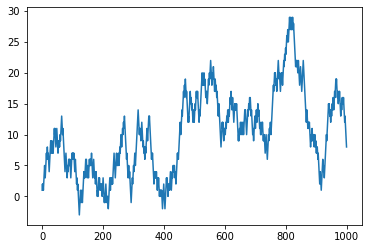

In [10]:
%%time
#compare the time to the regular Python version
# import some libraries
import random
import numpy as np
import matplotlib.pyplot as plt 
# Let's try the same thing but using the NumPy library: 
nsteps =1000
#1000 coin flips at once
# note: you could use ANY distribution including, say, the normal distribution: 
# np.random.normal(look up arguments!)
draws = np.random.randint(0,2,size = nsteps)
#print(draws)
# set these values to 1 or -1 using the WHERE CONDITIONAL 
steps = np.where(draws>0,1,-1)
#print(steps)
# the entire walk will be the cumulative distribution of the values -1 to 1 starting at 0
walk = steps.cumsum()
#print(walk)
plt.plot(walk[:nsteps])
# we can also look at a few interesting features: 
# minimum and maximum achieved - presumably we could just look at the graph to determine
# this:  
min_value_achieved = walk.min()
print(min_value_achieved)
max_value_achieved = walk.max()
print(max_value_achieved)
# If you are interested in Black-Scholes or, really, POPULATION GENETICS than you will be 
# interested in determining when a particular value is achieved on this random walk. 
# This is a hard but we have a 'cheat' to determine the index of this event. 
first_time_10_steps_away_from_0_index = (np.abs(walk) >= 10).argmax()
print(first_time_10_steps_away_from_0_index)

CPU times: user 33.1 ms, sys: 2.34 ms, total: 35.4 ms
Wall time: 34.1 ms


(0, 1)

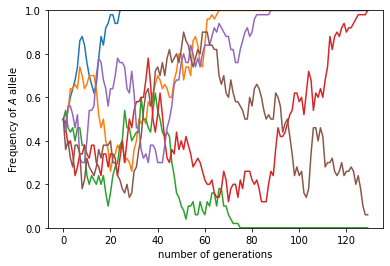

In [8]:
%%time
#------------------------------------------
# In fact, you may have noticed that the above code isn't ideal for situations where, 
# when the proportion hits 0, the run is over. This is particularly important in
# Population Genetics for describing genetic drift (and other uses) 
# This example is taken from the following website which gives a basic background 
# for genetic drift using an example of bison. 
# http://bi1.caltech.edu/code/t03_stochastic_simulations.html

#additionally, this might provide some hints about expanding the numpy simulation above 
# into multiple simulations that you will need to do for the homework 8!

#------------------------------------------
# Define some parameters of the simulation.
pop_size = 25  # Number of individuals in the population.
n_alleles = 2 * pop_size  # Total number of alleles in the population. 
n_gen = 130 # Number of generations to track the allele frequencies.
freq = 0.5  # Allele frequency of allele A.

# Set up a vector to store the allele frequency at each generation.
frequency = np.zeros(n_gen)  # Full of zeros.

# Set the initial condition.
frequency[0] = freq

# Loop through the generations. 
for i in range(1, n_gen):
    # Flip a coin for each member of the population.
    flips = np.random.rand(n_alleles)
    
    # Determine if each allele is 'A' or 'a' based on the frequency from
    # the previous generation.
    num_A = np.sum(flips < frequency[i-1])
    
    # Determine the new allele frequency.
    new_freq = num_A / n_alleles
    
    # Store the new allele frequency.
    frequency[i] = new_freq

# Set up a vector for the number of generations.
gen_vec = np.arange(0, n_gen, 1)

# Plot this single trajectory.
plt.plot(gen_vec, frequency)

# Add axis labels.
plt.xlabel('number of generations')
plt.ylabel('frequency of $A$ allele')

# Change the ylimits to cover the full range of possible frequencies.
plt.ylim([0, 1])

# Expand the simulation to cover all 5 recovering herds of bison. 
n_herds = 5
frequency = np.zeros((n_herds, n_gen))

# Loop through each herd and repeat the simulation.
for i in range(n_herds):
    # Set the initial frequency.
    frequency[i, 0] = 0.5
    for j in range(1, n_gen):
        # Flip the coins.
        flips = np.random.rand(n_alleles)
        
        # Find the number of 'A' alleles.
        num_A = np.sum(flips < frequency[i, j-1])
        
        # Determine the new frequency
        new_freq = num_A / n_alleles
        
        # Set the current allele frequency.
        frequency[i, j] = new_freq
# Plot the trajectories from all of the herds.
for i in range(n_herds):
    plt.plot(gen_vec, frequency[i, :])
    
# Add axis labels.
plt.xlabel('number of generations')
plt.ylabel('Frequency of $A$ allele')
plt.ylim([0, 1])